# 분류 알고리즘
  
# 1. 결정트리

결정 트리 학습법은 지도 분류 학습에서 가장 유용하게 사용되고 있는 기법 중 하나   
  
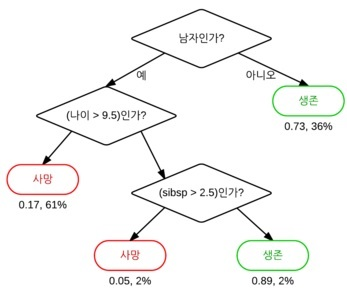  
  
그림에서 보는 것처럼 각 노드는 규칙을 갖고 노드간에 부모, 자식의 관계를 갖는다. 이러한 규칙은 머신이 학습을 통해 스스로 데이터로부터 규칙을 찾고 규칙들의 트리를 구성한다.  
  
규칙이 너무 많아서 트리의 깊이가 깊어지면 학습 데이터에 과적합될 수 있으므로 깊이가 작은것이 좋다. 작은 깊이에서 좋은 정확도를 가지려면 균일한 데이터셋을 구성해야 한다. 균일한 데이터란 데이터를 분류할 조건으로 많은 데이터가 조건을 만족할 수 있는 데이터를 말한다. 이는 똑같은 데이터를 학습하라는 말이 아니라 그렇게 되도록 적합한 조건을 찾는 것이 중요하다. 이러한 정보의 균일도를 측정하는 방법이 정보이득이다.   
  
정보이득은 엔트로피를 통해 얻을 수 있는데 서로 다른 값이 섞여 있으면 엔트로피가 높고, 값이 균일하면 엔트로피가 작다. 
  
정보이득 = 1 - 엔트로피  
  
정보이득이 높은 속성을 기준으로 먼저 분할한다.  
  
머신 러닝에서는 이와 관련된 계수를 지니 계수라 하고 이 값이 낮을 수록 데이터 균일도가 높은 것으로 간주한다.  
  
사이킷런은 DecisionTreeClassifier 클래스로 결정트리 알고리즘을 제공한다. 
  
* 결정트리 하이퍼 파라메터   

max_depth: 트리의 최대 깊이 규정. 디폴트는 None. 과적합 주의.   
  
max_features: 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None=데이터 세트의 모든 피처 사용하여 분할 수행.  
  
min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어하는 데 사용. 디폴트는 2.  
  
min_sample_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수    
  
max_leaf_nodes: 리프 노드의 최대 개수  
  
 

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
# https://graphviz.org/download/ 에서 다운로드 후 설치
# 설치시 패스 자동 등록 하지 말고 직접 등록
#사용자 변수에 패스 등록: C:\Program Files\Graphviz\bin
#시스템 변수에 패스 등록: C:\Program Files\Graphviz\bin\dot.exe
# 패스 등록해도 에러나면 재부팅

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. impurity:불순물보여줄지 결정. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names ,feature_names = iris_data.feature_names, impurity=True, filled=True)

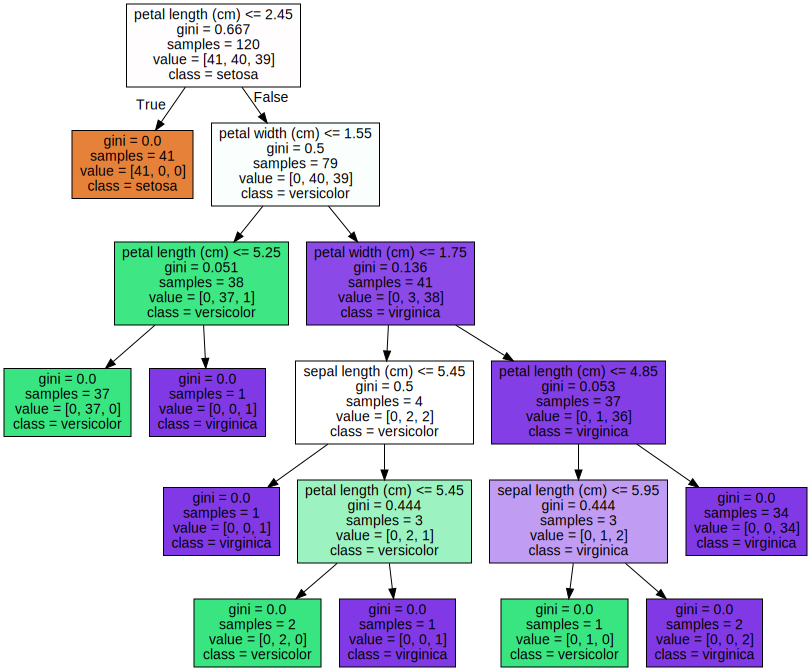

In [3]:
# pip install graphviz

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [4]:

# DecisionTree Classifier 생성
dt_clf2 = DecisionTreeClassifier(random_state=156, max_depth=4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, random_state=156)

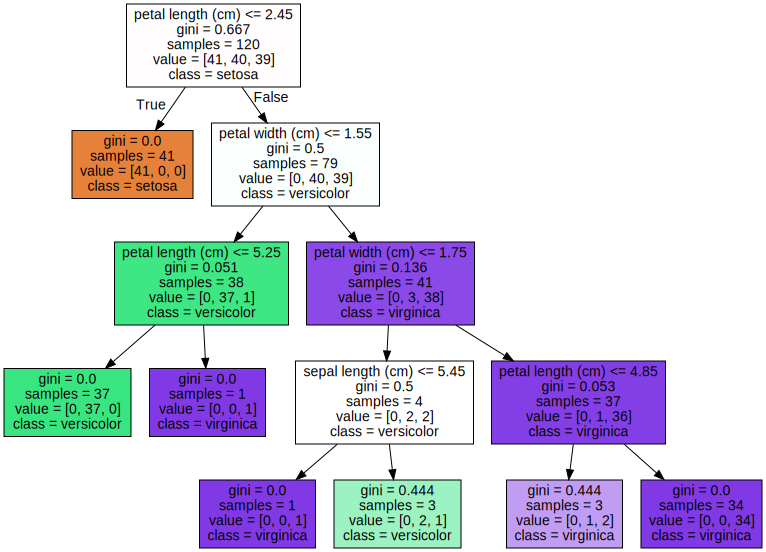

In [5]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf2, out_file="tree2.dot", class_names=iris_data.target_names ,feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
acc1 = accuracy_score(y_test, pred)

pred2 = dt_clf2.predict(X_test)
acc2 = accuracy_score(y_test, pred2)

print('dt_clf의 정확도:', acc1)
print('dt_clf2의 정확도:', acc2)

dt_clf의 정확도: 0.9333333333333333
dt_clf2의 정확도: 0.9333333333333333


# 2. 앙상블

여러 분류기를 생성하여 그 예측을 통합하는 알고리즘  

* 유형  
  
공통점: 여러 분류기의 투표 결과로 결정  
  
보팅: 서로 다른 알고리즘 여러개 결합. 선형회귀, K 최근접 이웃, SVM 알고리즘 등 다양한 알고리즘을 결합하여 만든다.    
배깅: 같은 알고리즘 여러개 결합. 랜덤 포레스트 알고리즘이 이에 속함  
부스팅: 여러개의 학습기를 순차로 학습->예측하면서 잘못 예측한 데이터에 가중치를 부여하여 오류 개선. 그래디언트 부스트 알고리즘이 이에 속함  

1)보팅  
하드 보팅: 다수 분류기가 결정한 예측을 선택  
소프트 보팅: 분류기들의 레이블 결정 확률의 평균을 내어 이 중 가장 큰 확률의 레이블 선택  
  
유방암 예측  

In [9]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


2) 배깅  
  
* 랜덤 포레스트: 대표적 배깅 알고리즘으로 빠르고 예측 성능이 좋다    
결정트리 여러개로 구성.  
각 분류기는 서로 다른 데이터셋을 학습하지만 일부 데이터는 중첩되어 있다. 이를 부트스트래핑이라 함.   
  
하이퍼 파라메터  
n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정하며 디폴트는 10  
max_features: 최대 feature 수   
max_depth, min_samples_leaf: 과적합 방지용  

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [2]:
# csv 파일 읽기
import numpy as np
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
x_data = df.drop('quality', axis=1)
y_data=df['quality']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 42)

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6500


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.6364


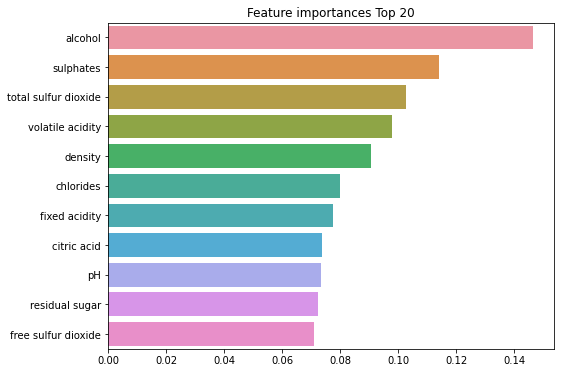

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

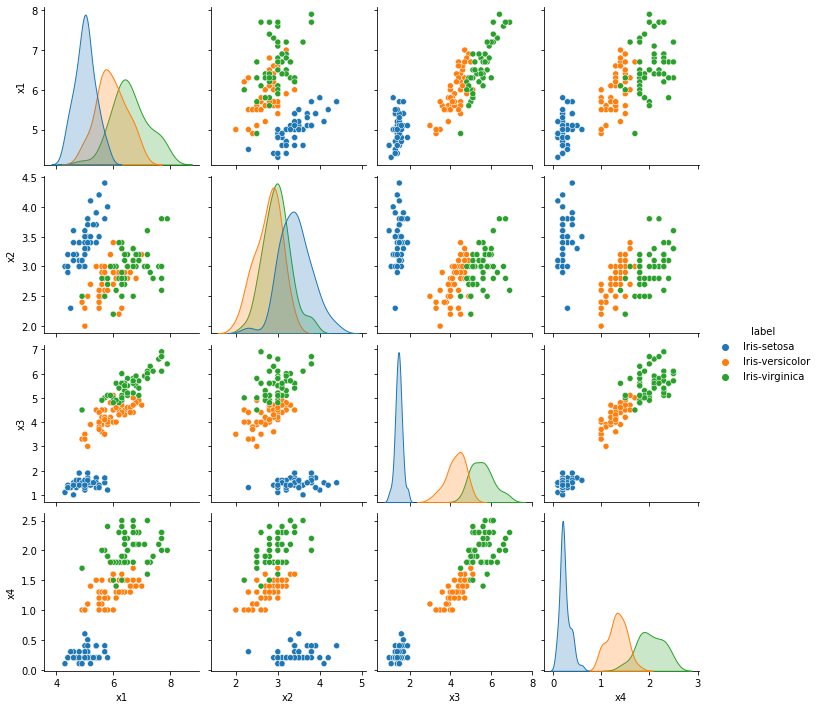

In [10]:
import seaborn as sns
import pandas as pd
cols = np.array(['x1', 'x2', 'x3', 'x4', 'label'])
data = pd.read_csv('../iris.data', names=cols)

sns.pairplot(data, hue='label')
plt.show()

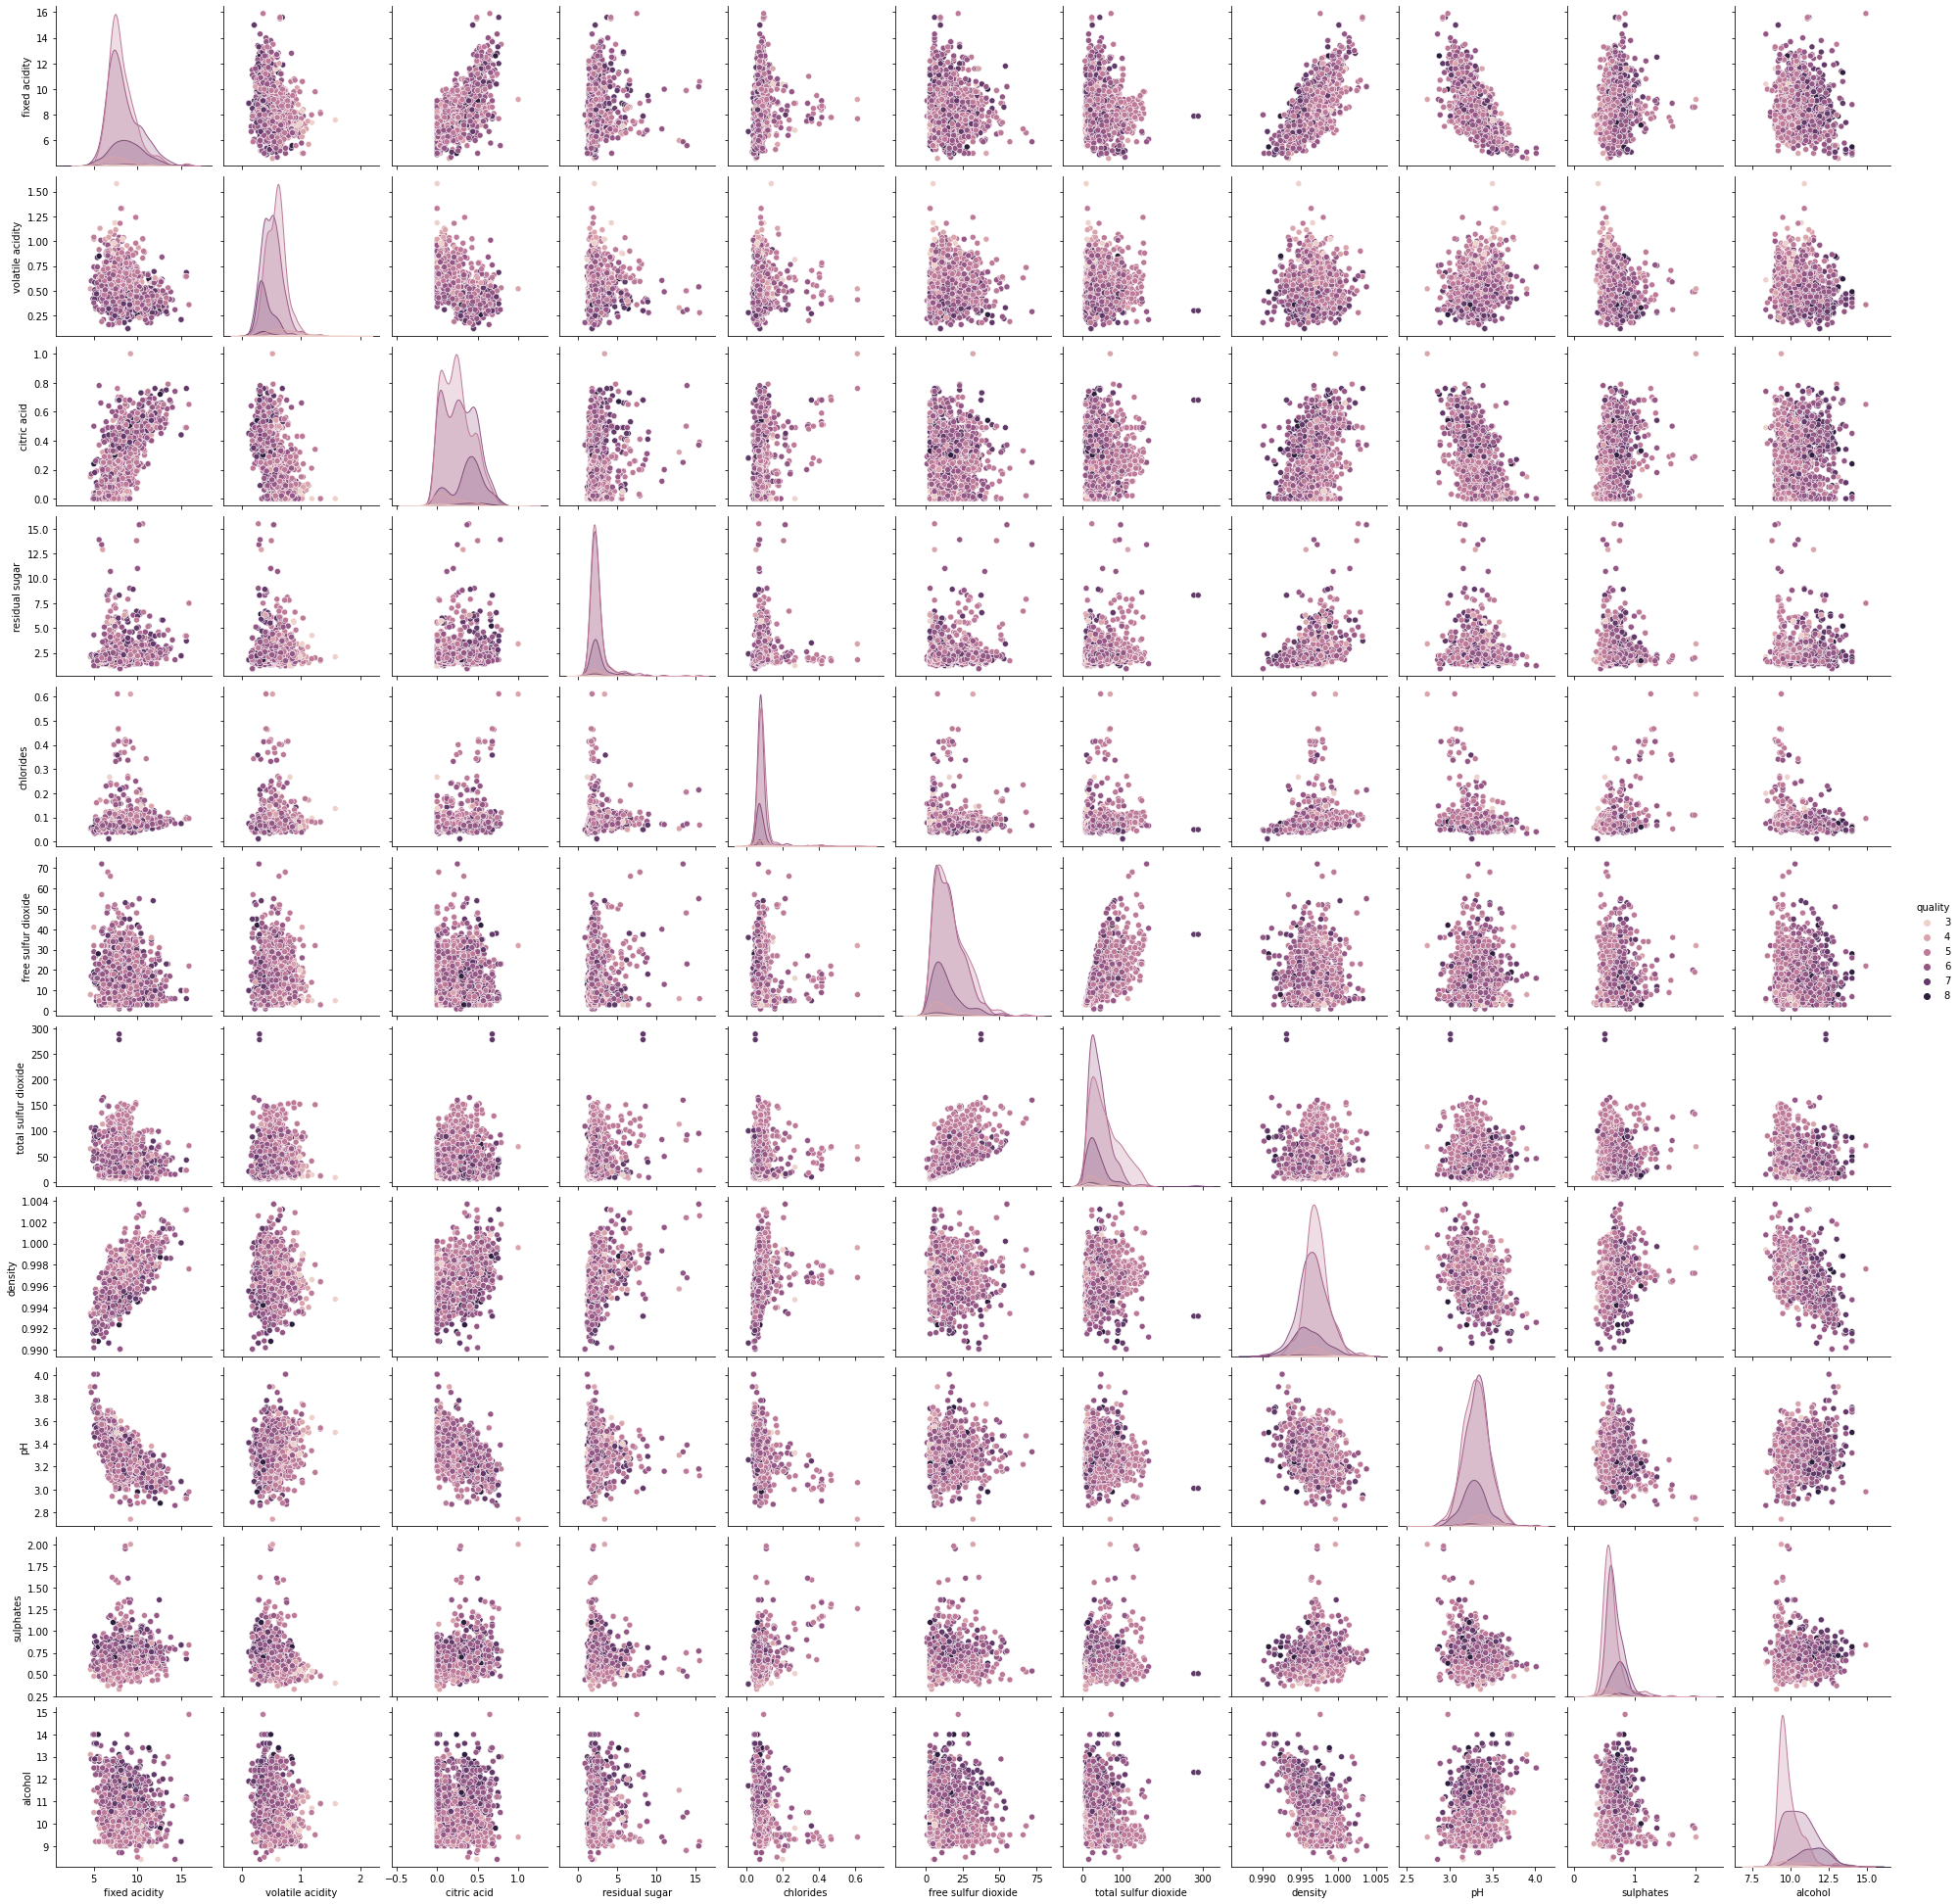

In [12]:
import seaborn as sns

sns.pairplot(df, hue='quality')
plt.show()

In [10]:
x_data2 = df[['alcohol','sulphates','total sulfur dioxide','volatile acidity', 'quality']]

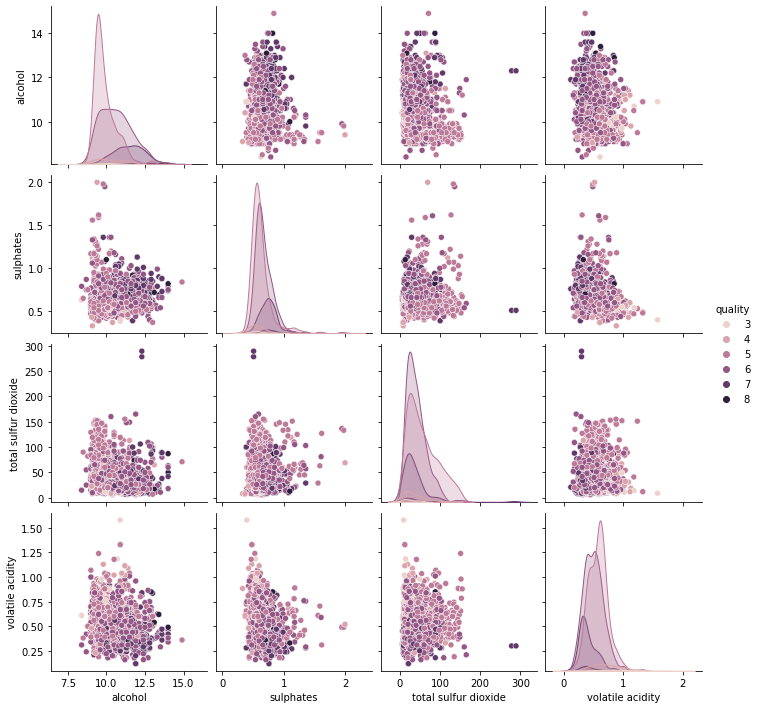

In [24]:
import seaborn as sns

sns.pairplot(x_data2, hue='quality')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_data3 = x_data2.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_data3, y_data, test_size = 0.20, random_state = 42)

rf_clf2 = RandomForestClassifier(random_state=0)
rf_clf2.fit(X_train , y_train)
pred = rf_clf2.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6406


In [12]:
len(rf_clf2.estimators_)

100

In [15]:
feature_list = x_data3.columns
feature_list

Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity'], dtype='object')

In [14]:
# Pull out one tree from the forest
tree = rf_clf2.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'wine_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

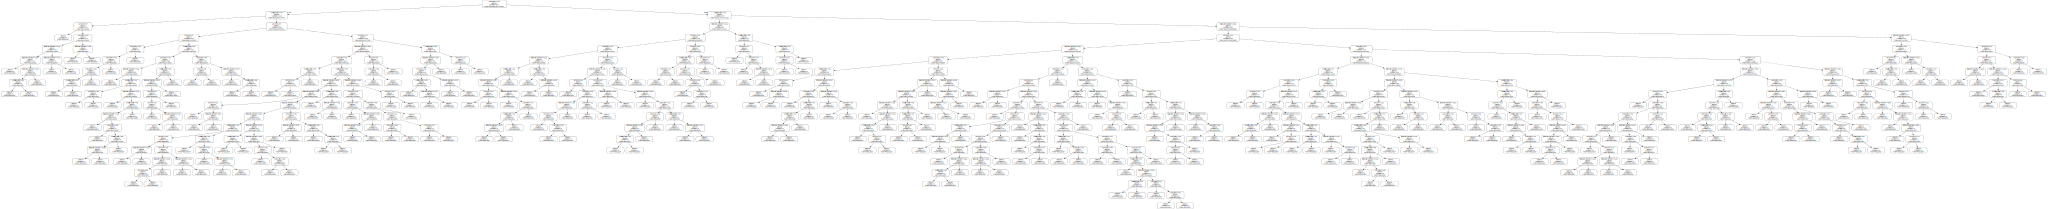

In [20]:
with open("wine_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [21]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 18


3) 부스팅  

* 그래디언트 부스트(GBM)  
여러 약한 학습기가 순차적으로 느슨하게 분류하고 오분류된 데이터에 대해 가중치를 부여하여, 예측 결정 기준을 모두 결합해 예측을 수행  
가중치 업데이트를 경사 하강법을 이용
  
GBM 하이퍼 파라미터 

loss : 경사 하강법에서 사용할 비용 함수 지정.  
learning_rate : 기본값은 0.1이며 0~1 사이의 값 지정.  
n_estimators : weak learner의 개수. 기본값은 100이며 개수가 많을 수록 예측 성능이 좋아질 수 있지만 수행 시간이 오래 걸림  
subsample :  weak learner가 학습에 사용하는 데이터의 샘플링 비율.  

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 42)

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
print(gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

[6 9 3 7 2 1 5 2 5 7 1 9 7 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 1 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 1 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 8 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 5 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 8 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
GBM 정확도: 0.9694
GBM 수행 시간: 6.7 초 


In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1) # verbose: 메시지 등급(1,2,3)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9506


In [25]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9722


* xgboost  
GBM에 기반하고 있고, 단점인 느린 수행 시간 및 과적합 등의 문제를 해결했으며 특히 병렬 학습이 가능해 기존 GBM보다 빠른 학습이 가능하다.  
- 뛰어난 예측 성능  
- GBM 대비 빠른 수행 시간  
- 과적합 규제  
- 나무 가지치기: 의미 없는 분할 제거  
- 결손값 자체 처리   
- 자체 내장된 교차 검증  
  
하이퍼 파라메터  
eta: Learning rate(일반적으로 0.01 - 0.2). 기본값 0.3  
max_depth: Tree 깊이 수  
num_boost_rounds : 생성할 weak learner의 수. GBM의 n_estimators와 같음  
early_stopping_rounds: 조기 중단을 위한 라운드를 설정합니다. 여기서 지정한 횟수만큼 반복한뒤 오류 개선이 안된다면 이 횟수에서 멈춤. 
조기 중단 기능 수행을 위해서는 반드시 eval_set과 eval_metric이 함께 사용  
object: 목적함수 종류  
  * binary:logistic(이진 분류)  
  * multi:softmax(다중 분류)  
  * multi-softprob(다중 확률)   

eval_metric: 평가 지표  
  * rmse – root mean square error  
  * mae – mean absolute error  
  * logloss – negative log-likelihood  
  * error – Binary classification error rate (0.5 threshold)  
  * merror – Multiclass classification error rate  
  * mlogloss – Multiclass logloss  
  * auc: Area under the curve  

In [26]:
# pip install xgboost
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [27]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [28]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)


(455, 30) (114, 30)


In [29]:
# DMatrix는 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost의 전용 데이터 세트
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [30]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

In [31]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:0.00678	eval-logloss:0.08637
[188]	train-logloss:0.00676	eval-logloss:0.08630
[189]	train-logloss:0.00675	eval-logloss:0.08610
[190]	train-logloss:

In [32]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [34]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

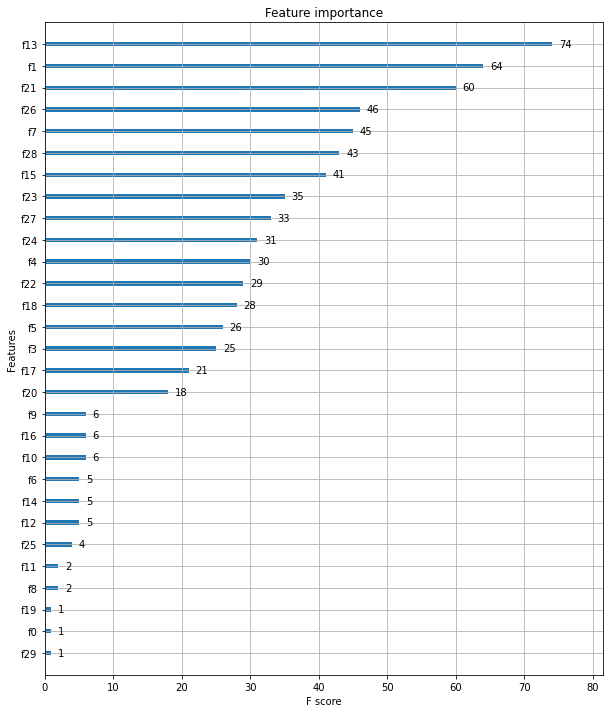

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

* Light GBM  
  
XGBoost보다 학습 시간이 훨씬 적고 메모리 사용량도 작다. 하지만 적은 데이터 세트에 적용할 경우 과적합이 쉽게 발생하는 단점이 있다.  
앞서 살펴본 알고리즘들은 균형 트리를 생성하느라 시간 및 비용이 많이 드는 단점을 극복하기 위해 리프 중심 트리 분할 방법을 사용한다. 이 방법은 균형을 맞추지 않고 계속 분할을 진행하여 트리 깊이가 깊어지고 비대칭 트리가 생성된다.  
  
- 더 빠른 학습과 예측 수행 시간  
- 더 작은 메모리 사용량  
- 카테고리형 피처의 자동 변환과 최적 분할  
  

In [22]:
# pip install lightgbm

# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [23]:
preds

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [24]:
pred_proba

array([0.60514473, 0.00747978, 0.94351324, 0.14309567, 0.97666949,
       0.99589589, 0.99463733, 0.99033792, 0.99349033, 0.00654626,
       0.00751406, 0.00638872, 0.99560947, 0.9954893 , 0.99356655,
       0.96678153, 0.95635214, 0.99473538, 0.99383193, 0.99593274,
       0.00777156, 0.5876595 , 0.00656564, 0.99638839, 0.00594322,
       0.81526836, 0.01474025, 0.00587159, 0.99377041, 0.0242365 ,
       0.98553497, 0.01294523, 0.98497669, 0.92830476, 0.00732147,
       0.00625249, 0.98253405, 0.98899133, 0.07296476, 0.99385772,
       0.11461538, 0.99377646, 0.99087695, 0.99304217, 0.98622586,
       0.97498294, 0.02660595, 0.99248776, 0.99545611, 0.99386516,
       0.9915662 , 0.00693255, 0.98171662, 0.99337763, 0.99092982,
       0.99330782, 0.99581591, 0.98826079, 0.991672  , 0.97171098,
       0.99534424, 0.95974318, 0.00901217, 0.00677597, 0.99194931,
       0.98398278, 0.00701729, 0.96502577, 0.99383957, 0.99535875,
       0.00637939, 0.99003118, 0.00586536, 0.97192919, 0.99497

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [38]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

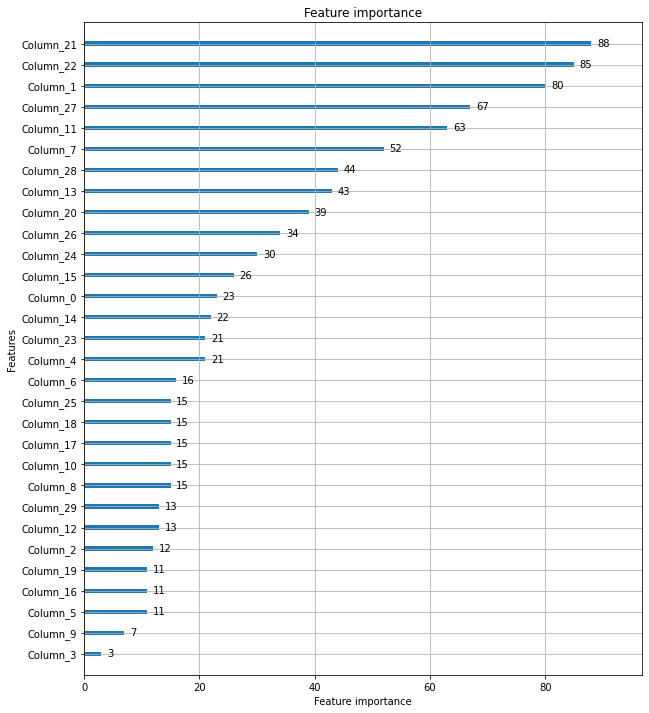

In [39]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# 3. SVM(Support Vector Machine)

결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델  
최적의 경계를 찾는 것이 목적  
분류하는 데이터들 사이의 마진이 최대가 되는 선이 좋다  
  
파라메터   
* C: 마진설정  
C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)  
  
* 커널: 경계선 형태  
선형(linear), 다항식(poly), 방사기저(rbf)
  
* gamma: 결정 경계 유연도. 보통 1. 값이 커질수록 가우시안 종의 폭이 좁아짐  
값이 너무 작으면 결정 경계를 직선에 가깝게 설정. 느슨하게 결정  
너무 크면 데이터에 꼭 맞추어 설정하므로 과적합 위험.  
과적합이면 값을 줄이고 과소적합이면 값을 확대한다.

In [42]:
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

clf = svm.SVC()

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('acc:', acc)

acc: 0.9298245614035088


In [46]:
from sklearn.model_selection import GridSearchCV

params = {
    'gamma':[0.1, 0.01, 0.001, 0.0001],
    'C' : [0.1, 0.01, 1, 2, 3], 
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(clf , param_grid=params , cv=2, refit=True )
grid_cv.fit(X_test , y_test)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'C': 2, 'gamma': 0.0001}
최고 예측 정확도: 0.9386


In [47]:

pred = grid_cv.predict(X_test)
acc = accuracy_score(y_test, pred)

print('acc:', acc)

acc: 0.9649122807017544


* 유리 종류 분류  
Id number: 1 to 214 (removed from CSV file)  
RI: refractive index  
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)  
Mg: Magnesium  
Al: Aluminum  
Si: Silicon  
K: Potassium  
Ca: Calcium  
Ba: Barium  
Fe: Iron  
Type of glass: (class attribute)  
-- 1 buildingwindowsfloatprocessed  
-- 2 buildingwindowsnonfloatprocessed  
-- 3 vehiclewindowsfloatprocessed  
-- 4 vehiclewindowsnonfloatprocessed (none in this database)  
-- 5 containers  
-- 6 tableware  
-- 7 headlamps  

In [49]:
import numpy as np
import pandas as pd

df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [50]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [51]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [72]:
from sklearn.preprocessing import StandardScaler

x_data = df.drop('Type', axis=1)
y_data = df[['Type']]

scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

In [73]:
X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=156 )

clf = svm.SVC()

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('acc:', acc)


acc: 0.7209302325581395


In [94]:

params = {
    'gamma': ['scale'],
    'C' : [0.1, 1, 2, 3, 4, 5], 
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(clf , param_grid=params , cv=3, refit=True )
# refit 을 True로 설정하여 찾은 최적의 하이퍼파라메터로 한번 더 학습하여 모델에 적용하는게 중요
grid_cv.fit(X_test , y_test)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'C': 4, 'gamma': 'scale'}
최고 예측 정확도: 0.6746


In [95]:
pred = grid_cv.predict(X_test)
acc = accuracy_score(y_test, pred)

print('acc:', acc)

acc: 0.8837209302325582


In [85]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 4. KNN(K-Nearest Neighbor)

어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식  
K: 참고할 이웃의 수. 기본값은 5  

In [48]:
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier


digits = datasets.load_digits()
clf = KNeighborsClassifier(n_neighbors=8)

x,y=digits.data[:-1], digits.target[:-1]
clf.fit(x,y)
y_pred=clf.predict(x)

print(y_pred)
print(y)

acc = accuracy_score(y, y_pred)

print('acc:', acc)

[0 1 2 ... 0 8 9]
[0 1 2 ... 0 8 9]
acc: 0.9894209354120267
